<a href="https://colab.research.google.com/github/vania-as/vania-as.github.io/blob/master/PC_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PRACTICA CALIFICADA 3**

INTEGRANTES


*   ARANDA FLORES PAOLA - 20196052
*   VILLACORTA BARRERA ANDRES - F1428225
*   ASPILCUETA SEREY VANIA - 20125751
*   ORÉ REYES ARMANDO ANDRÉ - 20090277

# Pregunta 1

*Brinde una explicación detallada del algoritmo que se utiliza para implementar un Arbol de Regresion.*

Primero se define una métrica de error  y en el caso de los árboles de regresión se suele usar el Error Cuadrado Medio(MSE). Esto se calcula como la suma de los cuadrados de las diferencias entre valores reales y el promedio de cada región.

**PASO 1:**

Luego el algoritmo va a buscar la mejor división. Es decir, para cada Xj  el algoritmo busca el punto de corte s que minimice el error de predicción. Es decir, para cada valor posible de X, se evalúa dividir los datos en dos grupos: i)  X S  y i)  X  > S En cada división, el algoritmo calcula el valor promedio de la variable objetivo Y en cada subconjunto (región) y estima el error de predicción, que se define generalmente como la suma de los errores al cuadrado (criterio de mínimos cuadrados).

**PASO 2:**
Para evaluar la calidad de una división, se usa la suma de los errores al cuadrado en cada nodo. Supongamos que el conjunto de datos está dividido en dos subconjuntos R1  y R2 después de una división basada en el valor s. El objetivo es encontrar el valor j (característica) y el valor s (punto de corte) que minimice la suma de errores al cuadrado.

**PASO 3:**

Una vez seleccionada la característica y el punto de corte que minimizan el error en el nodo inicial, el algoritmo divide el conjunto de datos en dos subconjuntos. Este proceso se repite de manera recursiva en cada uno de los nuevos nodos.
En cada paso, el algoritmo selecciona nuevamente la característica y el punto de corte que mejor separen los datos, minimizando el error en cada región.
De ese modo, se utilizará la división binaria recursiva para hacer crecer un árbol grande en los datos de entrenamiento, deteniéndose sólo cuando cada nodo terminal tenga menos de un número mínimo de observaciones o el árbol alcance un número máximo de niveles

**PASO 4**
Una vez construido el árbol, la predicción para una nueva observación se realiza de la siguiente forma:a) La observación se sigue por el árbol, tomando el camino correspondiente en cada nodo de acuerdo a los puntos de corte de las características.
b) La observación termina en una hoja (nodo final) y se le asigna el valor promedio de la variable objetivo 𝑦 y en esa hoja. Este valor promedio es la predicción para esa observación.

**PASO 5**
Para reducir el sobreajuste y mejorar la generalización del modelo, se puede aplicar un proceso de poda. La poda consiste en eliminar algunas de las ramas menos útiles del árbol, con el objetivo de reducir su complejidad.


# Pregunta 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
# Carga y preparación de la data
df = pd.read_csv('https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/carseats.csv')
df = df.drop('Unnamed: 0', axis=1)
df = pd.get_dummies(df, columns=df.select_dtypes(include=['object']).columns, drop_first=True)
df

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Good,ShelveLoc_Medium,Urban_Yes,US_Yes
0,9.50,138,73,11,276,120,42,17,False,False,True,True
1,11.22,111,48,16,260,83,65,10,True,False,True,True
2,10.06,113,35,10,269,80,59,12,False,True,True,True
3,7.40,117,100,4,466,97,55,14,False,True,True,True
4,4.15,141,64,3,340,128,38,13,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,33,14,True,False,True,True
396,6.14,139,23,3,37,120,55,11,False,True,False,True
397,7.41,162,26,12,368,159,40,18,False,True,True,True
398,5.94,100,79,7,284,95,50,12,False,False,True,True


*1. Divida los datos en conjuntos de entrenamiento y prueba*

In [ ]:
# Definir variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['Sales'])
y = df['Sales']

# Escalar las variables para regularización
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

*2. Ajuste un árbol de regresión al conjunto de entrenamiento. Interpreta los resultados. ¿Qué valor de MSE se obtiene para el conjunto de prueba?*

In [ ]:
# Ajustar un árbol de regresión
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = tree_model.predict(X_test)

# Calcular el MSE
mse_test = mean_squared_error(y_test, y_pred)
print("Mean Squared Error en el conjunto de prueba:", mse_test)

Mean Squared Error en el conjunto de prueba: 6.1412575


*3. Utilice el método Bagging para analizar estos datos. ¿Qué valor de MSE obtiene para el conjunto de prueba?*

In [ ]:
# Ajustar un modelo de Bagging con árboles de regresión
bagging_model = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=42)
bagging_model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_bagging = bagging_model.predict(X_test)

# Calcular el MSE
mse_test_bagging = mean_squared_error(y_test, y_pred_bagging)
print("Mean Squared Error con Bagging en el conjunto de prueba:", mse_test_bagging)

Mean Squared Error con Bagging en el conjunto de prueba: 3.087040449875


*4. Utilice el método Random Forest para analizar los datos. Repita el procedimiento descrito en el punto 3. Describa el efecto de m, el número de variables consideradas en cada división, sobre la tasa de error obtenida. Utilice la función features_imporance() para determinar qué varibles son las más importantes.*

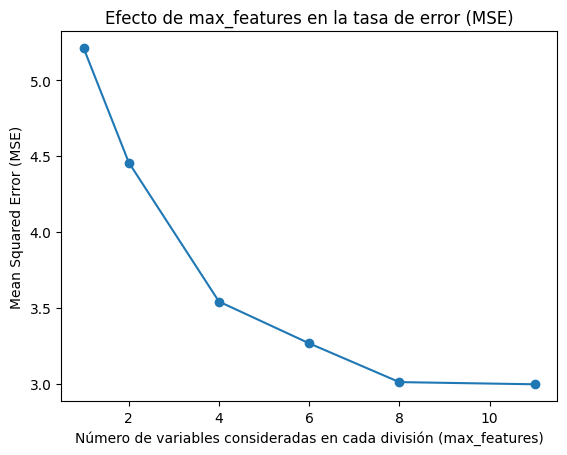

Importancia de las variables:
              Feature  Importance
4              Price    0.308641
7     ShelveLoc_Good    0.198399
5                Age    0.120021
0          CompPrice    0.092958
2        Advertising    0.082591
8   ShelveLoc_Medium    0.064645
1             Income    0.051968
3         Population    0.039585
6          Education    0.030814
9          Urban_Yes    0.005875
10            US_Yes    0.004504


In [ ]:
# Probar diferentes valores de max_features
m_values = [1, 2, 4, 6, 8, X_train.shape[1]]
mse_results = []

for m in m_values:
    # Ajustar un modelo de Random Forest con el valor de max_features actual
    rf_model = RandomForestRegressor(n_estimators=100, max_features=m, random_state=42)
    rf_model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred_rf = rf_model.predict(X_test)

    # Calcular el MSE y almacenarlo
    mse_test_rf = mean_squared_error(y_test, y_pred_rf)
    mse_results.append(mse_test_rf)

# Graficar el MSE en función de max_features
plt.plot(m_values, mse_results, marker='o')
plt.xlabel('Número de variables consideradas en cada división (max_features)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Efecto de max_features en la tasa de error (MSE)')
plt.show()

# Determinar la importancia de las variables con el último modelo entrenado
feature_importances = rf_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Importancia de las variables:\n", importance_df)

*5. Utilice el método Gradient Boosting. Repita el procedimiento descrito en el punto 4.*

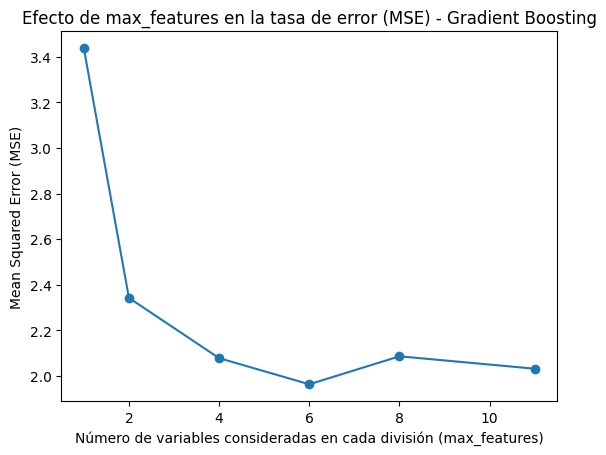

Importancia de las variables:
              Feature  Importance
4              Price    0.333669
7     ShelveLoc_Good    0.206373
0          CompPrice    0.115486
5                Age    0.112415
2        Advertising    0.090628
8   ShelveLoc_Medium    0.068230
1             Income    0.040410
3         Population    0.016914
6          Education    0.015478
10            US_Yes    0.000293
9          Urban_Yes    0.000104


In [ ]:
# Probar diferentes valores de max_features
m_values = [1, 2, 4, 6, 8, X_train.shape[1]]
mse_results = []

for m in m_values:
    # Ajustar un modelo de Gradient Boosting con el valor de max_features actual
    gb_model = GradientBoostingRegressor(n_estimators=100, max_features=m, random_state=42)
    gb_model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred_gb = gb_model.predict(X_test)

    # Calcular el MSE y almacenarlo
    mse_test_gb = mean_squared_error(y_test, y_pred_gb)
    mse_results.append(mse_test_gb)

# Graficar el MSE en función de max_features
plt.plot(m_values, mse_results, marker='o')
plt.xlabel('Número de variables consideradas en cada división (max_features)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Efecto de max_features en la tasa de error (MSE) - Gradient Boosting')
plt.show()

# Determinar la importancia de las variables con el último modelo entrenado
feature_importances = gb_model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

print("Importancia de las variables:\n", importance_df)

# Pregunta 3

In [ ]:

#Se carga las librerías
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

In [ ]:

# Cargar el dataset
data = load_breast_cancer()
X = data.data
y = data.target


In [ ]:
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Inicializar modelos
models = {
    'Random Forest': RandomForestClassifier(random_state=42),
    'Bagging': BaggingClassifier(random_state=42),
    'Boosting (AdaBoost)': AdaBoostClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}


In [ ]:
# Entrenar y evaluar cada modelo
for name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)

    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Evaluar precisión
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Modelo: {name}")
    print("Accuracy:", accuracy)
    print("Matriz de Confusión:\n", confusion_matrix(y_test, y_pred))
    print("Reporte de Clasificación:\n", classification_report(y_test, y_pred))
    print("="*60)

Modelo: Random Forest
Accuracy: 0.935672514619883
Matriz de Confusión:
 [[ 58   6]
 [  5 102]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171

Modelo: Bagging
Accuracy: 0.9590643274853801
Matriz de Confusión:
 [[ 59   5]
 [  2 105]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        64
           1       0.95      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Modelo: Boosting (AdaBoost)
Accuracy: 0.9590643274853801
Matriz de Confusión:
 [[ 59   5]
 [  2 105]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.97      0.92      0.94        64
           1       0.95      0.98      0.97       107

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Modelo: Logistic Regression
Accuracy: 0.9473684210526315
Matriz de Confusión:
 [[ 56   8]
 [  1 106]]
Reporte de Clasificación:
               precision    recall  f1-score   support

           0       0.98      0.88      0.93        64
           1       0.93      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Precisión de los Resultados Comparados:

Según los resultado, Random Forest tiene una precisión del 93.57%, con un recall de 0.95 y un f1-score de 0.94 para la clase 1. Sin embargo, muestra un pequeño sesgo en la clase 0, con una precisión y un recall ligeramente más bajos (0.91 y 0.92).
Bagging y Boosting (AdaBoost) obtuvieron una precisión ligeramente mayor, ambas con 95.90%. Estos modelos presentan un rendimiento balanceado en ambas clases, logrando altos valores de recall y f1-score (0.98 y 0.97 para la clase 1, y 0.92 y 0.94 para la clase 0).
Regresión Logística obtuvo una precisión de 94.15%, ubicandose entre Random Forest y los métodos de Bagging y Boosting. Su desempeño en términos de recall y precisión en la clase 1 es bueno (0.98), aunque muestra una ligera disminución en el f1-score para la clase 0 en comparación con Bagging y Boosting.
Mejor Desempeño:Los métodos de Bagging y Boosting presentan el mejor desempeño general en cuanto a precisión, recall y f1-score. Logran una precisión ligeramente superior y son más consistentes en sus valores de recall y precisión en ambas clases. Además, tienen un f1-score alto y equilibrado para ambas clases, lo que indica una capacidad robusta para clasificar correctamente tanto la clase positiva como la negativa.
Regresión Logística también ofrece buenos resultados y es comparable a Random Forest, pero no alcanza el nivel de consistencia y precisión de Bagging y Boosting.


# Pregunta 4
Implemente una red neuronal con la database Default (puede encontrar el set de datos aquı). Use una capa oculta con 10 unidades y regularizacion por droput.Compare el desempeño de clasificacion con respecto al de la regresion lineal.

## 4.1. Instalación e importación de librerias

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings('ignore', message="Coordinate descent without L1 regularization may lead to unexpected results and is discouraged.")
warnings.filterwarnings('ignore', category=ConvergenceWarning)

In [ ]:
# Basic
import numpy as np
import pandas as pd
import requests
import json

# Plotting
import matplotlib.pyplot as plt

# Scikit-Learn
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import sklearn.model_selection as skm
import sklearn.linear_model as skl

# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing import sequence

# TensorFlow
from tensorflow.keras.datasets import mnist, cifar100, imdb
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 4.2. Ajuste para Regresión Lineal y Red Neuronal Simple

In [ ]:
default = pd.read_csv('https://raw.githubusercontent.com/qlabpucp/datasets/main/datasets/default.csv')
default = default.dropna()
default = default.drop(columns = ['Unnamed: 0'])
default = pd.get_dummies(default, dtype='int')
default = default.drop(columns = ['default_No', 'student_No'])
default = default.reindex()
default.shape

(10000, 4)

In [ ]:
target = [ 'income' ]
predictors = [ var for var in default.columns if var not in target ]

X_train, X_test, y_train, y_test = skm.train_test_split(default[predictors], default[target], test_size=0.33, random_state=0)

In [ ]:
# Linear Regression

lr_model = skl.LinearRegression()
lr_model.fit( X_train, y_train)
y_pred_lr = lr_model.predict(X_test)
mse_lr = round( mean_squared_error(y_test, y_pred_lr), 3 )

In [ ]:
# Neural network

modnn = Sequential()
modnn.add(Dense(units=10, activation='relu', input_shape=(len(predictors),)))
modnn.add(Dropout(rate=0.4))
modnn.add(Dense(units=1))

modnn.compile(loss='mean_squared_error',
              optimizer=RMSprop(),
              metrics=['mean_squared_error'])

history = modnn.fit(X_train, y_train,
                    epochs=150, batch_size=32,
                    validation_data=(X_test, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - loss: 1277363456.0000 - mean_squared_error: 1277363456.0000 - val_loss: 1214326784.0000 - val_mean_squared_error: 1214326784.0000
Epoch 2/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1188860288.0000 - mean_squared_error: 1188860288.0000 - val_loss: 1148440960.0000 - val_mean_squared_error: 1148440960.0000
Epoch 3/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1137529472.0000 - mean_squared_error: 1137529472.0000 - val_loss: 1073829248.0000 - val_mean_squared_error: 1073829248.0000
Epoch 4/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1053020480.0000 - mean_squared_error: 1053020480.0000 - val_loss: 989891584.0000 - val_mean_squared_error: 989891584.0000
Epoch 5/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 973673280.0000 - mean_squared_error: 973673280.0000 - val_loss: 900394048.0000 - val_mean_squared_error: 900394048.0000
Epoch 6/150
210/210 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 907671104.0000 - me

In [ ]:
# Computamos el test error para la red neuronal simple

y_pred_nn = modnn.predict(X_test)
mse_nn = round( mean_squared_error(y_test, y_pred_nn), 3 )
mse_nn

104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


512053840.827

## 4.3. Comparamos el rendimiento de ambos modelos

In [ ]:
mse_values = {
    'Linear Regression': mse_lr, 'Neural Network': mse_nn
}
mse_df = pd.DataFrame(list(mse_values.items()), columns=['Model', 'MSE'])
mse_df

,Model,MSE
0,Linear Regression,7.675160e+07
1,Neural Network,5.120538e+08


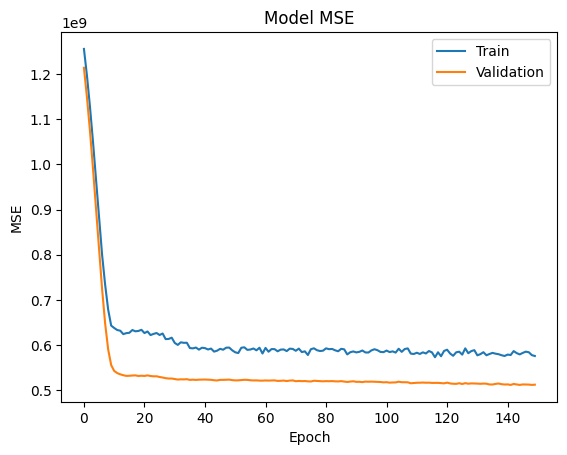

In [ ]:
# Visualizamos la variación del MSE para la red neuronal

plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

## 4.4. **CONCLUSIÓN:** El mejor desempeño lo presenta la red neuronal por sobre la regresión lineal simple.

**Pregunta 5**

Considere la implementacion del **modelo de Redes Neuronales Convolucionales (CNN)** utilizando la dataset **CIFAR 100** presentada en el notebook de clases. En esta implementacion inicial, se alcanzo un Accuracy aproximado de 0.44. Su tarea es *desarrollar una nueva implementacion que supere este valor de Accuracy*. Para lograrlo, se le anima a experimentar con los siguientes aspectos
del modelo:

• Arquitectura del Modelo: Puede considerar la adicion de mas capas convolucionales y de pooling, incrementar el numero de filtros por capa, o modificar el tamaño del kernel.

• Regularizacion: Experimente con diferentes tasas de dropout para prevenir el sobreajuste.

• Entrenamiento: Pruebe con distintos tamaños de batch que puedan influir en la convergencia del modelo durante el entrenamiento.

• Optimizacion: Evalue el uso de diferentes algoritmos de optimizacion para verificar si mejoran la precision del modelo.

La meta es ajustar estos parametros para superar el Accuracy de 0.44 previamente alcanzado.

Documente todas las modificaciones realizadas y los resultados obtenidos.

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers, models
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()
print(x_train.shape)
print(x_test.shape)

# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Convert labels to categorical
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


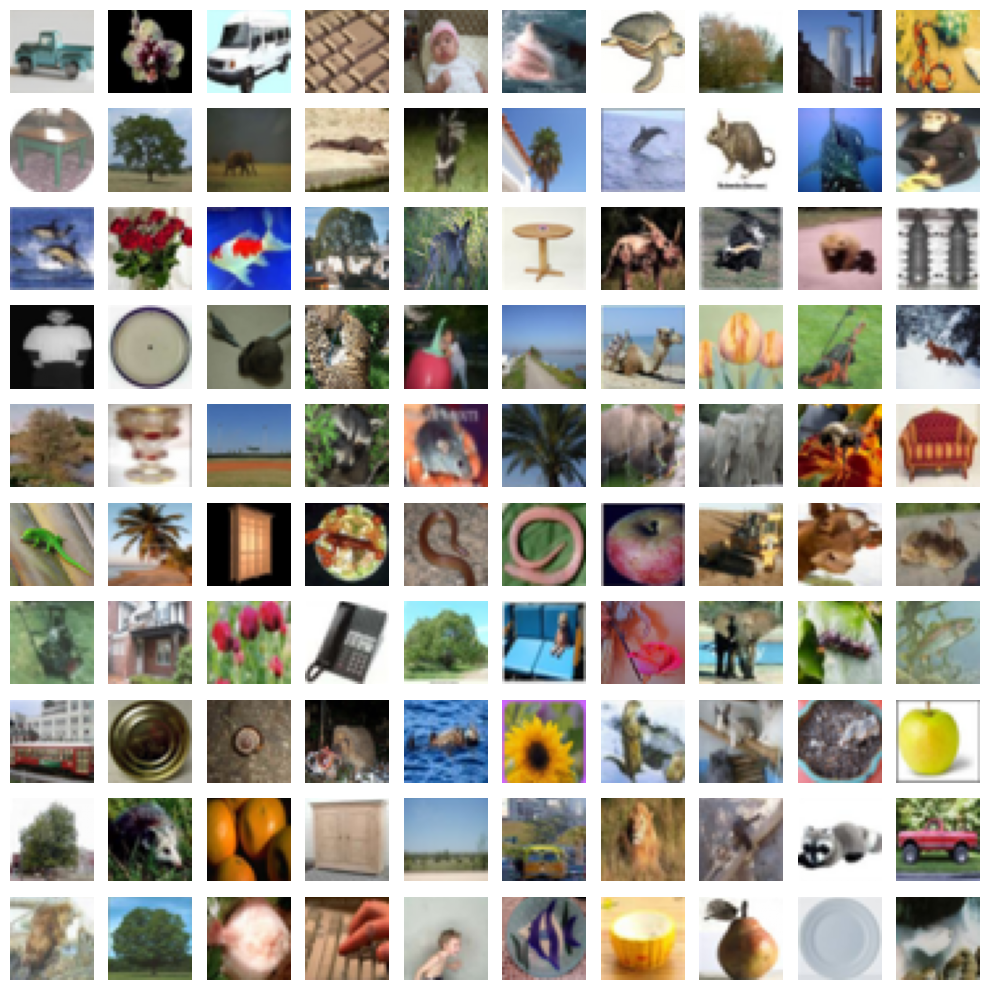

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Visualizar un conjunto de 100 imágenes aleatorias del conjunto CIFAR-100
fig, axes = plt.subplots(10, 10, figsize=(10, 10))
index = np.random.choice(range(50000), size=100, replace=False)  # Seleccionar índices aleatorios
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[index[i]])  # Mostrar imagen en el subgráfico
    ax.axis('off')  # Quitar los ejes
plt.tight_layout()  # Ajustar la disposición para que no se solapen las imágenes
plt.show()  # Mostrar las imágenes

# Continuar con el experimento o la visualización del modelo


**Experimentando con arquitectura del modelo**







In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# Build the model
model = keras.Sequential([
    # Primera capa con kernel más grande
    keras.layers.Conv2D(filters=32, kernel_size=(5, 5), padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Capa convolucional adicional
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Capa convolucional adicional
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Capa convolucional adicional
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Capa de aplanamiento
    keras.layers.Flatten(),

    # Regularización Dropout
    keras.layers.Dropout(rate=0.5),

    # Capa densa
    keras.layers.Dense(units=512, activation='relu'),

    # Capa de salida
    keras.layers.Dense(units=100, activation='softmax')
])

# Compilar el modelo
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)

# Evaluación del modelo
y_pred_cnn = np.argmax(model.predict(x_test), axis=1)
y_test_cnn = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_pred_cnn, y_test_cnn)
print('Test accuracy:', accuracy)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step - accuracy: 0.0298 - loss: 4.3904 - val_accuracy: 0.1210 - val_loss: 3.7567
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 11ms/step - accuracy: 0.1352 - loss: 3.6462 - val_accuracy: 0.2104 - val_loss: 3.2613
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2201 - loss: 3.1872 - val_accuracy: 0.2548 - val_loss: 3.0336
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2711 - loss: 2.9031 - val_accuracy: 0.3005 - val_loss: 2.7779
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3182 - loss: 2.6815 - val_accuracy: 0.3296 - val_loss: 2.6551
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3528 - loss: 2.4957 - val_accuracy: 0.3575 - val_loss: 2.5265
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3792 - loss: 2.3598 - val_accuracy: 0.3582 - val_loss: 2.5088
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4132 - loss: 2.2016 - val_accuracy

In [4]:
#Estimando precisión (accuracy) del modelo

y_pred_cnn = np.argmax(model.predict(x_test), axis=1)
y_test_cnn = np.argmax(y_test, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [5]:
accuracy = accuracy_score(y_pred_cnn, y_test_cnn)
print('Test accuracy:', accuracy)

Test accuracy: 0.4366


In [6]:
# Build the model
model = keras.Sequential([
    #primera capa con más filtros
        keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
    #segunda capa con más filtros
        keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
    #tercera capa con más filtros
        keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
    #cuarta capa con más filtros
        keras.layers.Conv2D(filters=512, kernel_size=(3, 3), padding='same', activation='relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),


        keras.layers.Flatten(),
        keras.layers.Dropout(rate=0.5),
        keras.layers.Dense(units=512, activation='relu'),
        keras.layers.Dense(units=100, activation='softmax')
])

# Compile and train the model
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.RMSprop(),
              metrics=['accuracy'])
#con más epochs
history = model.fit(x_train, y_train, epochs=40, batch_size=128, validation_split=0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 14s 32ms/step - accuracy: 0.0271 - loss: 4.4391 - val_accuracy: 0.0824 - val_loss: 3.9544
Epoch 2/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 15ms/step - accuracy: 0.1249 - loss: 3.7282 - val_accuracy: 0.1603 - val_loss: 3.4971
Epoch 3/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.1990 - loss: 3.2946 - val_accuracy: 0.2331 - val_loss: 3.1200
Epoch 4/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.2667 - loss: 2.9570 - val_accuracy: 0.2492 - val_loss: 3.0821
Epoch 5/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.3232 - loss: 2.6694 - val_accuracy: 0.2824 - val_loss: 2.9330
Epoch 6/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.3790 - loss: 2.4051 - val_accuracy: 0.3541 - val_loss: 2.6124
Epoch 7/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.4141 - loss: 2.2196 - val_accuracy: 0.3815 - val_loss: 2.4161
Epoch 8/40
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.4699 - loss: 1.9782 - val_ac

In [ ]:
y_pred_cnn = np.argmax(model.predict(x_test), axis=1)
y_test_cnn = np.argmax(y_test, axis=1)

In [7]:
accuracy = accuracy_score(y_pred_cnn, y_test_cnn)
print('Test accuracy:', accuracy)

Test accuracy: 0.4366


Respuesta: no hay una mejor arquitectura disponible para tener un mejor resultado

**Experimentando con la regularización**

In [8]:
from tensorflow.keras import datasets, layers, models

In [9]:
# Build the improved model with Dropout for regularization
model = models.Sequential([
    # Primera capa convolucional
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),  # Agregamos Dropout del 20%

    # Segunda capa convolucional
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.3),  # Aumentamos Dropout a 30%

    # Tercera capa convolucional
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),  # Dropout del 40%

    # Cuarta capa convolucional
    layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.4),  # Dropout del 40% en capa más profunda

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),  # Dropout final del 50% en la capa densa
    layers.Dense(100, activation='softmax')
])

# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.0196 - loss: 4.5150 - val_accuracy: 0.0717 - val_loss: 4.1486
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.0697 - loss: 4.0454 - val_accuracy: 0.1224 - val_loss: 3.7828
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1138 - loss: 3.7687 - val_accuracy: 0.1685 - val_loss: 3.5465
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1498 - loss: 3.5570 - val_accuracy: 0.1901 - val_loss: 3.3802
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1783 - loss: 3.3969 - val_accuracy: 0.2131 - val_loss: 3.2553
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2063 - loss: 3.2697 - val_accuracy: 0.2384 - val_loss: 3.1213
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2233 - loss: 3.1688 - val_accuracy: 0.2378 - val_loss: 3.1097
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2397 - loss: 3.0703 - val_accuracy:

In [10]:
# Evaluate the model
y_pred_cnn = np.argmax(model.predict(x_test), axis=1)
y_test_cnn = np.argmax(y_test, axis=1)
accuracy = accuracy_score(y_pred_cnn, y_test_cnn)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Test accuracy: 0.3921


In [11]:
# Lista de tasas de dropout para experimentar
dropout_rates = [0.3, 0.4, 0.5, 0.6]
accuracies = []

for rate in dropout_rates:
    print(f"\nEntrenando con tasa de Dropout: {rate}\n")

    # Build the model with the current dropout rate
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(rate=rate),  # Apply current dropout rate
        layers.Dense(512, activation='relu'),
        layers.Dense(100, activation='softmax')
    ])

    # Compile the model
    model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.RMSprop(), metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)

    # Evaluate the model
    y_pred_cnn = np.argmax(model.predict(x_test), axis=1)
    y_test_cnn = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_pred_cnn, y_test_cnn)
    accuracies.append((rate, accuracy))
    print(f'Tasa de Dropout: {rate}, Test accuracy: {accuracy}')

# Resultados
print("\nResultados de accuracy para cada tasa de Dropout:")
for rate, acc in accuracies:
    print(f"Tasa de Dropout: {rate}, Test accuracy: {acc}")


Entrenando con tasa de Dropout: 0.3



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.0303 - loss: 4.3978 - val_accuracy: 0.1026 - val_loss: 3.8482
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1276 - loss: 3.7134 - val_accuracy: 0.1646 - val_loss: 3.4930
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2054 - loss: 3.2801 - val_accuracy: 0.2490 - val_loss: 3.0704
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2626 - loss: 2.9789 - val_accuracy: 0.2571 - val_loss: 3.0567
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3123 - loss: 2.7288 - val_accuracy: 0.3006 - val_loss: 2.7799
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3513 - loss: 2.5301 - val_accuracy: 0.3321 - val_loss: 2.6487
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3976 - loss: 2.3169 - val_accuracy: 0.3403 - val_loss: 2.6081
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4345 - loss: 2.1423 - val_accuracy: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.0321 - loss: 4.3949 - val_accuracy: 0.0932 - val_loss: 3.8849
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.1270 - loss: 3.7147 - val_accuracy: 0.1686 - val_loss: 3.4593
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.1982 - loss: 3.3129 - val_accuracy: 0.1820 - val_loss: 3.4558
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2506 - loss: 3.0261 - val_accuracy: 0.2421 - val_loss: 3.1155
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2935 - loss: 2.8194 - val_accuracy: 0.3062 - val_loss: 2.7717
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3356 - loss: 2.6133 - val_accuracy: 0.3168 - val_loss: 2.7274
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3694 - loss: 2.4354 - val_accuracy: 0.3537 - val_loss: 2.5474
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4012 - loss: 2.2953 - val_accuracy: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.0247 - loss: 4.4540 - val_accuracy: 0.0685 - val_loss: 4.0323
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1023 - loss: 3.8643 - val_accuracy: 0.1267 - val_loss: 3.7270
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1729 - loss: 3.4461 - val_accuracy: 0.2288 - val_loss: 3.1625
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2290 - loss: 3.1374 - val_accuracy: 0.2152 - val_loss: 3.2894
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2707 - loss: 2.9111 - val_accuracy: 0.2952 - val_loss: 2.8096
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3111 - loss: 2.7108 - val_accuracy: 0.3245 - val_loss: 2.7137
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3457 - loss: 2.5365 - val_accuracy: 0.3474 - val_loss: 2.5777
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3846 - loss: 2.3663 - val_accuracy: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.0247 - loss: 4.4484 - val_accuracy: 0.0807 - val_loss: 3.9320
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1022 - loss: 3.8432 - val_accuracy: 0.1575 - val_loss: 3.5097
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1716 - loss: 3.4482 - val_accuracy: 0.2054 - val_loss: 3.2595
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2183 - loss: 3.1763 - val_accuracy: 0.2475 - val_loss: 3.0447
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2627 - loss: 2.9677 - val_accuracy: 0.2881 - val_loss: 2.8385
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2981 - loss: 2.7909 - val_accuracy: 0.2996 - val_loss: 2.7650
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3297 - loss: 2.6348 - val_accuracy: 0.3335 - val_loss: 2.6081
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3531 - loss: 2.5040 - val_accuracy: 0

In [ ]:
Respuesta: las tasas de dropout más altas dan mejores resultados.

**Experimentando con entrenamiento**

In [12]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


# Definir diferentes tamaños de batch para experimentar
batch_sizes = [32, 64, 256]
accuracies = []

for batch_size in batch_sizes:
    print(f"\nEntrenando con batch_size = {batch_size}\n")

    # Build the model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(rate=0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(100, activation='softmax')
    ])

    # Compile the model
    model.compile(loss='categorical_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=30, batch_size=batch_size, validation_split=0.2, verbose=1)

    # Evaluate the model
    y_pred_cnn = np.argmax(model.predict(x_test), axis=1)
    y_test_cnn = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_pred_cnn, y_test_cnn)
    accuracies.append((batch_size, accuracy))
    print(f'Batch size: {batch_size}, Test accuracy: {accuracy}')

# Resultados
print("\nResultados de accuracy para cada tamaño de batch:")
for batch_size, acc in accuracies:
    print(f"Batch size: {batch_size}, Test accuracy: {acc}")



Entrenando con batch_size = 32



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.0459 - loss: 4.2794 - val_accuracy: 0.1462 - val_loss: 3.6207
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.1739 - loss: 3.4474 - val_accuracy: 0.2436 - val_loss: 3.0832
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2455 - loss: 3.0410 - val_accuracy: 0.2822 - val_loss: 2.8517
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.2946 - loss: 2.7812 - val_accuracy: 0.3217 - val_loss: 2.6846
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.3328 - loss: 2.5993 - val_accuracy: 0.3256 - val_loss: 2.6566
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.3616 - loss: 2.4671 - val_accuracy: 0.3344 - val_loss: 2.6760
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3918 - loss: 2.3338 - val_accuracy: 0.3639 - val_loss: 2.5241
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4099 - loss: 2.2462 - 

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.0339 - loss: 4.3668 - val_accuracy: 0.1147 - val_loss: 3.8336
Epoch 2/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.1522 - loss: 3.5660 - val_accuracy: 0.2161 - val_loss: 3.1874
Epoch 3/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2295 - loss: 3.1509 - val_accuracy: 0.2883 - val_loss: 2.8625
Epoch 4/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.2831 - loss: 2.8605 - val_accuracy: 0.3094 - val_loss: 2.7578
Epoch 5/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.3259 - loss: 2.6224 - val_accuracy: 0.3489 - val_loss: 2.5636
Epoch 6/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3691 - loss: 2.4265 - val_accuracy: 0.3799 - val_loss: 2.4386
Epoch 7/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4045 - loss: 2.2778 - val_accuracy: 0.3800 - val_loss: 2.4209
Epoch 8/30
625/625 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4321 - loss: 2.1440 - val_accuracy: 0.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 9s 37ms/step - accuracy: 0.0208 - loss: 4.4932 - val_accuracy: 0.0590 - val_loss: 4.0736
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.0815 - loss: 3.9738 - val_accuracy: 0.1135 - val_loss: 3.7492
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1380 - loss: 3.6461 - val_accuracy: 0.1474 - val_loss: 3.7409
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.1795 - loss: 3.4363 - val_accuracy: 0.1702 - val_loss: 3.4645
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2169 - loss: 3.2025 - val_accuracy: 0.2234 - val_loss: 3.1332
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2461 - loss: 3.0500 - val_accuracy: 0.2498 - val_loss: 3.0729
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2716 - loss: 2.8995 - val_accuracy: 0.2470 - val_loss: 3.1455
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.3070 - loss: 2.7708 - val_accu

Respuesta: El que da un mejor resultado es **Batch size: 256**, Test accuracy: 0.4458

**Experimentando con optimización**

In [13]:

# Lista de optimizadores para experimentar
optimizers = {
    'RMSprop': tf.keras.optimizers.RMSprop(),
    'Adam': tf.keras.optimizers.Adam(),
    'SGD': tf.keras.optimizers.SGD(),
    'Adamax': tf.keras.optimizers.Adamax(),
    'Adagrad': tf.keras.optimizers.Adagrad()
}

accuracies = []

for opt_name, optimizer in optimizers.items():
    print(f"\nEntrenando con el optimizador: {opt_name}\n")

    # Build the model
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dropout(rate=0.5),
        layers.Dense(512, activation='relu'),
        layers.Dense(100, activation='softmax')
    ])

    # Compile the model with the selected optimizer
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    # Train the model
    history = model.fit(x_train, y_train, epochs=30, batch_size=128, validation_split=0.2, verbose=1)

    # Evaluate the model
    y_pred_cnn = np.argmax(model.predict(x_test), axis=1)
    y_test_cnn = np.argmax(y_test, axis=1)
    accuracy = accuracy_score(y_pred_cnn, y_test_cnn)
    accuracies.append((opt_name, accuracy))
    print(f'Optimizador: {opt_name}, Test accuracy: {accuracy}')

# Resultados
print("\nResultados de accuracy para cada optimizador:")
for opt_name, acc in accuracies:
    print(f"Optimizador: {opt_name}, Test accuracy: {acc}")



Entrenando con el optimizador: RMSprop



/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.0295 - loss: 4.4141 - val_accuracy: 0.0993 - val_loss: 3.8386
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.1209 - loss: 3.7615 - val_accuracy: 0.1734 - val_loss: 3.4091
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1838 - loss: 3.3739 - val_accuracy: 0.2279 - val_loss: 3.1795
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2384 - loss: 3.0864 - val_accuracy: 0.2494 - val_loss: 3.0373
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2818 - loss: 2.8730 - val_accuracy: 0.2879 - val_loss: 2.8437
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3149 - loss: 2.6910 - val_accuracy: 0.3224 - val_loss: 2.6933
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.3540 - loss: 2.5300 - val_accuracy: 0.3338 - val_loss: 2.6707
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3851 - loss: 2.3721 - val_accuracy: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.0339 - loss: 4.3652 - val_accuracy: 0.1234 - val_loss: 3.7408
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.1454 - loss: 3.5867 - val_accuracy: 0.2266 - val_loss: 3.1547
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.2286 - loss: 3.1282 - val_accuracy: 0.2821 - val_loss: 2.8852
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2820 - loss: 2.8320 - val_accuracy: 0.3301 - val_loss: 2.6581
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.3283 - loss: 2.6037 - val_accuracy: 0.3527 - val_loss: 2.5328
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.3649 - loss: 2.4215 - val_accuracy: 0.3797 - val_loss: 2.4182
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4003 - loss: 2.2575 - val_accuracy: 0.3809 - val_loss: 2.3898
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4340 - loss: 2.1224 - val_accuracy: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.0106 - loss: 4.6084 - val_accuracy: 0.0126 - val_loss: 4.6014
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0126 - loss: 4.6017 - val_accuracy: 0.0201 - val_loss: 4.5974
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0141 - loss: 4.5988 - val_accuracy: 0.0186 - val_loss: 4.5914
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0167 - loss: 4.5921 - val_accuracy: 0.0202 - val_loss: 4.5805
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.0183 - loss: 4.5818 - val_accuracy: 0.0265 - val_loss: 4.5532
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0235 - loss: 4.5516 - val_accuracy: 0.0400 - val_loss: 4.4496
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0321 - loss: 4.4420 - val_accuracy: 0.0474 - val_loss: 4.2911
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0428 - loss: 4.3181 - val_accuracy: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.0234 - loss: 4.4652 - val_accuracy: 0.1061 - val_loss: 3.9639
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.1084 - loss: 3.8669 - val_accuracy: 0.1600 - val_loss: 3.5310
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1630 - loss: 3.5133 - val_accuracy: 0.2110 - val_loss: 3.2892
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2077 - loss: 3.2706 - val_accuracy: 0.2315 - val_loss: 3.1428
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2364 - loss: 3.1144 - val_accuracy: 0.2569 - val_loss: 3.0293
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2621 - loss: 2.9948 - val_accuracy: 0.2750 - val_loss: 2.9163
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.2807 - loss: 2.8932 - val_accuracy: 0.2775 - val_loss: 2.9383
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.3012 - loss: 2.7816 - val_accuracy: 0

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 8s 16ms/step - accuracy: 0.0095 - loss: 4.6069 - val_accuracy: 0.0088 - val_loss: 4.6049
Epoch 2/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0100 - loss: 4.6053 - val_accuracy: 0.0100 - val_loss: 4.6040
Epoch 3/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0097 - loss: 4.6045 - val_accuracy: 0.0098 - val_loss: 4.6032
Epoch 4/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.0111 - loss: 4.6039 - val_accuracy: 0.0098 - val_loss: 4.6026
Epoch 5/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0117 - loss: 4.6028 - val_accuracy: 0.0115 - val_loss: 4.6019
Epoch 6/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.0133 - loss: 4.6019 - val_accuracy: 0.0123 - val_loss: 4.6011
Epoch 7/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0115 - loss: 4.6017 - val_accuracy: 0.0142 - val_loss: 4.6004
Epoch 8/30
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.0129 - loss: 4.6008 - val_accuracy: 0

Respuesta: El mejor optimizador es **Adam, Test accuracy: 0.4659**

**Resultado de modelo mejorado**

In [14]:
# Construir el modelo
model = keras.Sequential([
    # Primera capa convolucional con kernel más grande
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Segunda capa convolucional
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Tercera capa convolucional
    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Cuarta capa convolucional
    keras.layers.Conv2D(filters=256, kernel_size=(3, 3), padding='same', activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),

    # Aplanar y añadir capas densas con Dropout modificado
    keras.layers.Flatten(),
    keras.layers.Dropout(rate=0.3),  # Dropout más bajo en la primera capa densa
    keras.layers.Dense(units=512, activation='relu'),
    keras.layers.Dropout(rate=0.4),  # Dropout en la segunda capa densa
    keras.layers.Dense(units=100, activation='softmax')
])

# Compilar el modelo con optimizador Adam
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(x_train, y_train, epochs=30, batch_size=256, validation_split=0.2)

# Estimar la precisión del modelo
y_pred_cnn = np.argmax(model.predict(x_test), axis=1)
y_test_cnn = np.argmax(y_test, axis=1)

accuracy = accuracy_score(y_pred_cnn, y_test_cnn)
print('Test accuracy:', accuracy)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 27s 53ms/step - accuracy: 0.0596 - loss: 4.5156 - val_accuracy: 0.0137 - val_loss: 6.8064
Epoch 2/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.1736 - loss: 3.4646 - val_accuracy: 0.0414 - val_loss: 6.2958
Epoch 3/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.2389 - loss: 3.0741 - val_accuracy: 0.1643 - val_loss: 3.6545
Epoch 4/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.2958 - loss: 2.7631 - val_accuracy: 0.2878 - val_loss: 2.8474
Epoch 5/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.3474 - loss: 2.5271 - val_accuracy: 0.3508 - val_loss: 2.5362
Epoch 6/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3844 - loss: 2.3345 - val_accuracy: 0.3678 - val_loss: 2.4831
Epoch 7/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.4106 - loss: 2.1887 - val_accuracy: 0.3889 - val_loss: 2.4123
Epoch 8/30
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.4565 - loss: 2.0122 - val_acc

Resultado: Test accuracy 0.4568 (un poco más alto que el resultado de 0.44)